In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [38]:
file_paths = ['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

with open('ww.txt', 'w', encoding='utf-8') as output_file:
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as input_file:
            for line in input_file:
                output_file.write(line)

In [39]:
with open('ww.txt', 'r', encoding='utf-8') as output_file:
    text = output_file.read().lower()
text = re.sub('\n',' ', text)
text = re.sub('[^а-я ]','', text)    

In [40]:
RUS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

Строим матрицу переходных вероятностей

In [41]:
prob = np.zeros((len(RUS), len(RUS)))
for cp, cn in zip(text[:-1], text[1:]):
    prob[POS[cp], POS[cn]] += 1
prob = (prob / prob.sum(axis=1)[:, None])

df = pd.DataFrame(prob, index=(c for c in RUS), columns=(c for c in RUS))

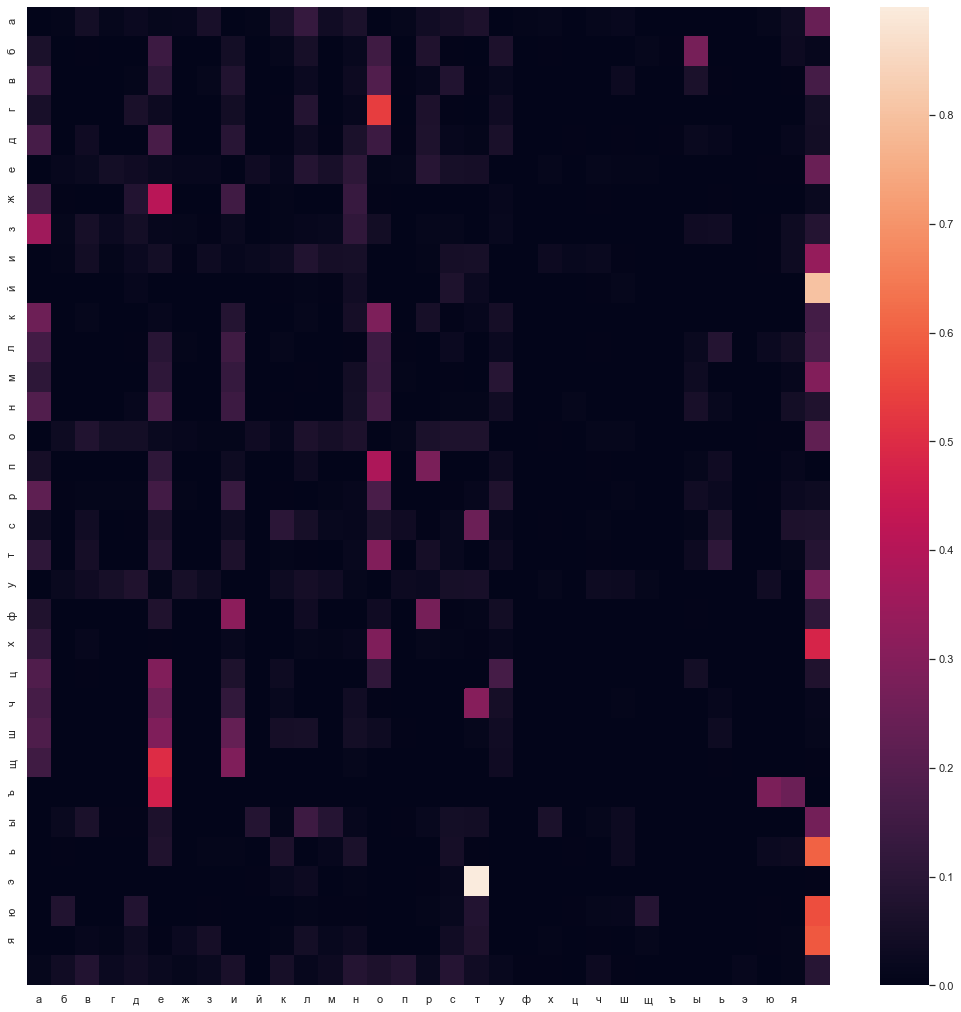

In [42]:
plt.figure(figsize=(18,18))
sns.heatmap(df);


Вероятность слова из 4 символов, начинающегося на "п" и заканчивающегося на "р"

In [43]:
prob4 = np.linalg.matrix_power(prob, 4)
df4 = pd.DataFrame(prob4, index=(c for c in RUS), columns=(c for c in RUS))
df4['п']['р']

0.02036111812221675

Слово из 8 символов на "б"

In [50]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=prob[index])
    s.append(next_char)

print (''.join(s))

бавовапр


Оценка ряда

In [2]:
from hmmlearn.hmm import GaussianHMM

In [6]:
series = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']

In [7]:
values = series.values.reshape(-1,1)

In [36]:
sc = float('-inf')
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    if model.score(values) > sc:
        sc = model.score(values)
        num = n
print (num, model.score(values))

14 -523.7850747211561


Прогноз ряда

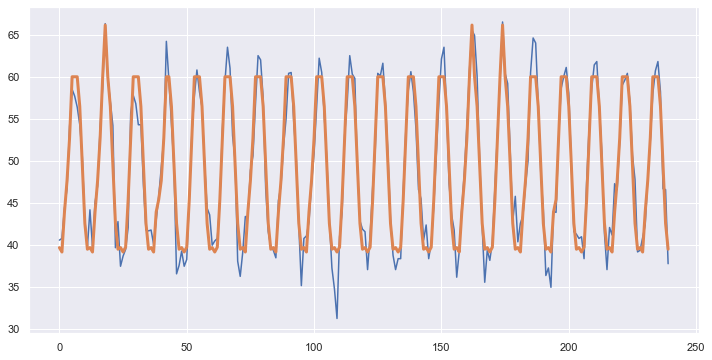

In [37]:
model = GaussianHMM(n_components=14,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)